In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv("cardekho_data.csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df["Owner"].unique()

array([0, 1, 3], dtype=int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
df.size

2709

In [12]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.duplicated().sum()

2

In [14]:
df.drop_duplicates(inplace= True)

In [15]:
df.duplicated().sum()

0

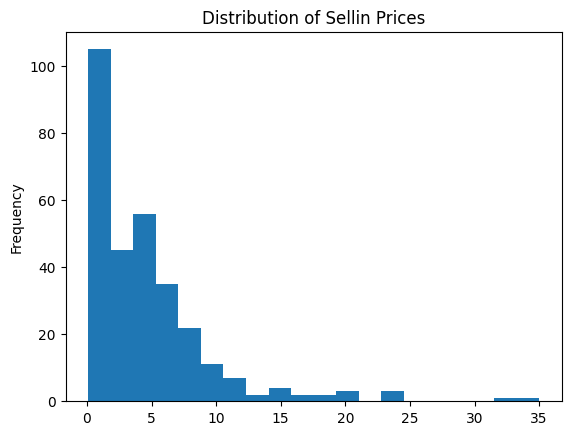

In [16]:
df["Selling_Price"].plot(kind='hist', bins=20, title="Distribution of Sellin Prices")
plt.show()

In [17]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [18]:
fuel_type_avg_price= df.groupby("Fuel_Type")["Selling_Price"].mean()
fuel_type_avg_price

Fuel_Type
CNG        3.100000
Diesel    10.102759
Petrol     3.264184
Name: Selling_Price, dtype: float64

In [19]:
fuel_type_avg_price.sort_values(ascending= False)

Fuel_Type
Diesel    10.102759
Petrol     3.264184
CNG        3.100000
Name: Selling_Price, dtype: float64

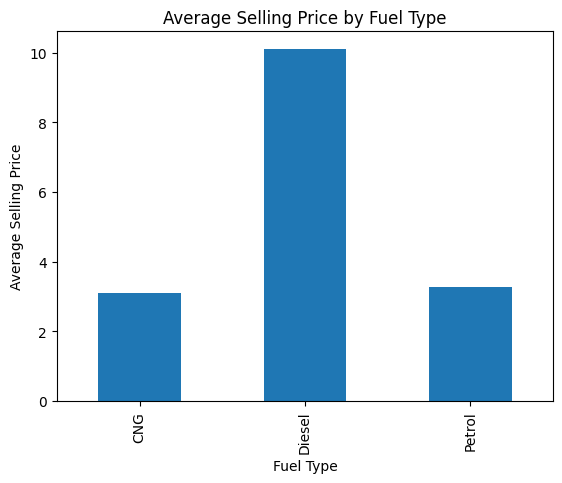

In [20]:
fuel_type_avg_price.plot(kind="bar", title="Average Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Selling Price")
plt.show()

In [21]:
transmission_counts = df["Transmission"].value_counts()

In [22]:
transmission_counts

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

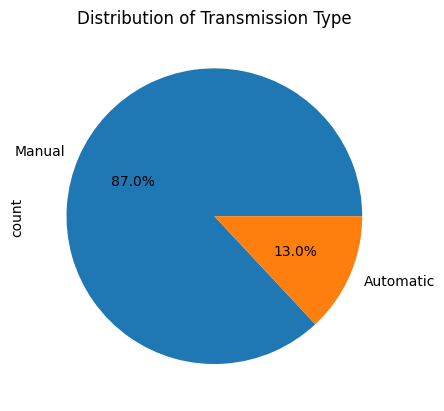

In [23]:
transmission_counts.plot(kind= "pie", autopct="%1.1f%%",title="Distribution of Transmission Type")
plt.show()

In [24]:
seller_type_total_present_price = df.groupby("Seller_Type")["Present_Price"].sum()
seller_type_total_present_price

Seller_Type
Dealer        2081.43
Individual     173.34
Name: Present_Price, dtype: float64

In [25]:
yearly_avg_km_driven = df.groupby("Year")["Kms_Driven"].mean()
yearly_avg_km_driven


Year
2003     94500.000000
2004    135154.000000
2005    104294.000000
2006     87422.250000
2007     51000.000000
2008    112128.571429
2009     67820.500000
2010     60014.066667
2011     40327.368421
2012     43798.217391
2013     41534.333333
2014     38080.315789
2015     31977.683333
2016     17885.040816
2017     10419.800000
2018      2071.000000
Name: Kms_Driven, dtype: float64

In [26]:
fuel_trans_max_sell = df.groupby(["Fuel_Type","Transmission"])["Selling_Price"].max()
fuel_trans_max_sell

Fuel_Type  Transmission
CNG        Manual           3.25
Diesel     Automatic       33.00
           Manual          35.00
Petrol     Automatic       19.75
           Manual          17.00
Name: Selling_Price, dtype: float64

In [27]:
fuel_trans_max_sell.reset_index()

,Fuel_Type,Transmission,Selling_Price
0,CNG,Manual,3.25
1,Diesel,Automatic,33.00
2,Diesel,Manual,35.00
3,Petrol,Automatic,19.75
4,Petrol,Manual,17.00


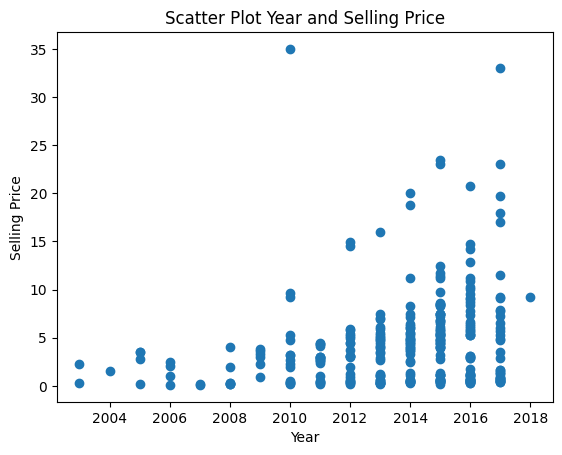

In [28]:
plt.scatter(df["Year"], df["Selling_Price"])
plt.title("Scatter Plot Year and Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

Text(0, 0.5, 'Kms Driven')

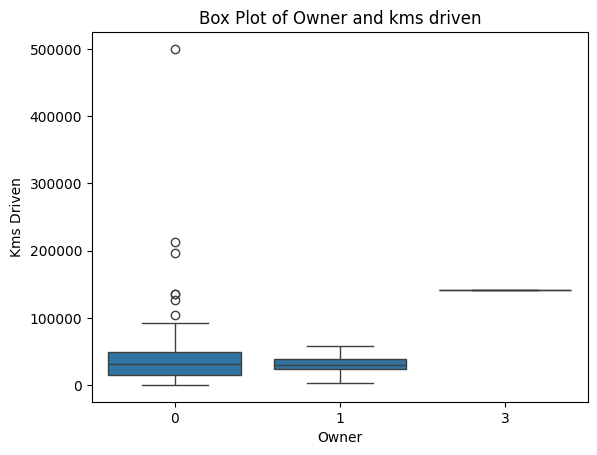

In [29]:
sns.boxplot(x='Owner', y='Kms_Driven', data=df)
plt.title("Box Plot of Owner and kms driven")
plt.xlabel("Owner")
plt.ylabel("Kms Driven")

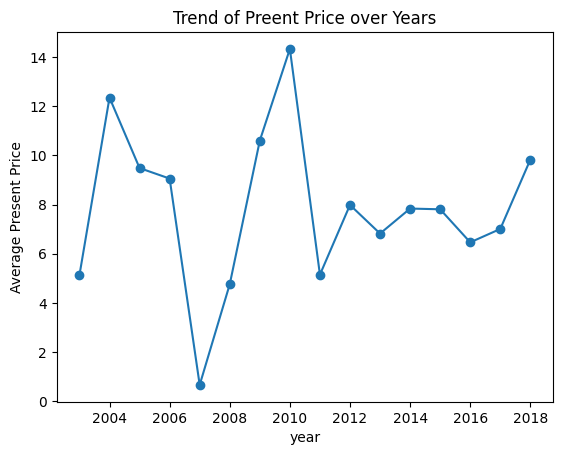

In [30]:
plt.plot(df.groupby("Year")["Present_Price"].mean(), marker="o")
plt.title("Trend of Preent Price over Years")
plt.xlabel("year")
plt.ylabel("Average Present Price")
plt.show()

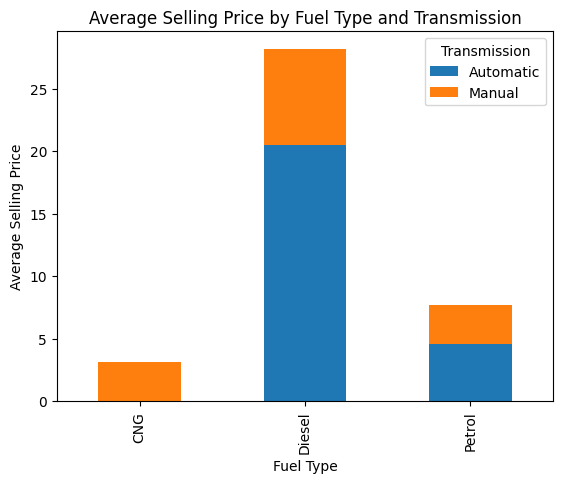

In [31]:
df.groupby(["Fuel_Type","Transmission"])["Selling_Price"].mean().unstack().plot(kind='bar',stacked=True)
plt.title("Average Selling Price by Fuel Type and Transmission")
plt.xlabel("Fuel Type")
plt.ylabel("Average Selling Price")
plt.show()


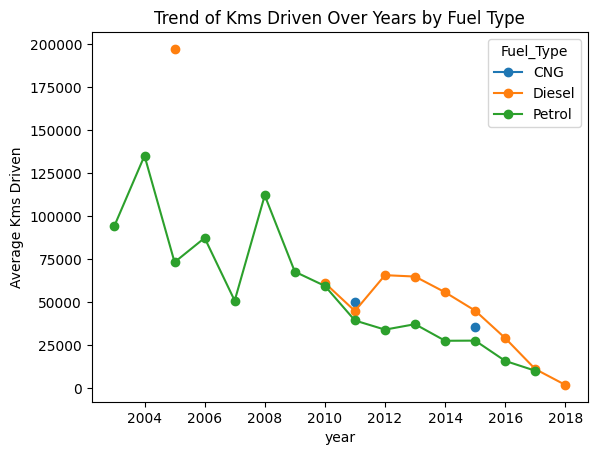

In [32]:
df.groupby(["Year", "Fuel_Type"])["Kms_Driven"].mean().unstack().plot(kind="line", marker="o")
plt.title("Trend of Kms Driven Over Years by Fuel Type")
plt.xlabel("year")
plt.ylabel("Average Kms Driven")
plt.show()

In [33]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [34]:
y=df["Selling_Price"]

In [35]:
X=df[["Year", "Kms_Driven", "Fuel_Type", "Transmission","Owner"]]

In [36]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [37]:
X

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,Petrol,Manual,0
1,2013,43000,Diesel,Manual,0
2,2017,6900,Petrol,Manual,0
3,2011,5200,Petrol,Manual,0
4,2014,42450,Diesel,Manual,0
...,...,...,...,...,...
296,2016,33988,Diesel,Manual,0
297,2015,60000,Petrol,Manual,0
298,2009,87934,Petrol,Manual,0
299,2017,9000,Diesel,Manual,0


In [38]:
from sklearn import preprocessing

In [39]:
labelencoder = preprocessing.LabelEncoder()

In [40]:
X["Fuel_Type"] = labelencoder.fit_transform(X["Fuel_Type"])
X["Transmission"]= labelencoder.fit_transform(X["Transmission"])

C:\Users\himan\AppData\Local\Temp\ipykernel_31624\2384242277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Fuel_Type"] = labelencoder.fit_transform(X["Fuel_Type"])
C:\Users\himan\AppData\Local\Temp\ipykernel_31624\2384242277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Transmission"]= labelencoder.fit_transform(X["Transmission"])


In [41]:
X

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,2,1,0
1,2013,43000,1,1,0
2,2017,6900,2,1,0
3,2011,5200,2,1,0
4,2014,42450,1,1,0
...,...,...,...,...,...
296,2016,33988,1,1,0
297,2015,60000,2,1,0
298,2009,87934,2,1,0
299,2017,9000,1,1,0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [43]:
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()
scaled_X_train = sclaer.fit_transform(X_train)
scaled_X_test = sclaer.fit_transform(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [61]:
def modelresults(predictions):
    print("Mean Absolute error is {}".format(mean_absolute_error(y_test,predictions)))
    print("Mean Squared error is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr =LinearRegression()
lr.fit(scaled_X_train,y_train)

LinearRegression()

In [64]:
predictionlr =lr.predict(scaled_X_test)

In [65]:
modelresults(predictionlr)

Mean Absolute error is 3.608433784598883
Mean Squared error is 5.510614746516164


In [66]:
from sklearn.svm import SVR

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
svrmodel = SVR()

In [69]:
param_gridsvr = {"C":[0.01,0.1,0.2,0.5], "kernel":["linear","rbf","poly"], "degree":[2,3,4]}

In [70]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)

In [71]:
gridsvr.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.2, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [72]:
gridsvr.best_params_

{'C': 0.1, 'degree': 2, 'kernel': 'linear'}

In [73]:
predsgridsvr = gridsvr.predict(scaled_X_test)

In [74]:
modelresults(predsgridsvr)

Mean Absolute error is 3.5251209857207146
Mean Squared error is 5.766493480770858


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rfrmodel = RandomForestRegressor()
param_gridrfr= { "max_depth":[3,5,7,9,10,12,15], "n_estimators":[2,4,5,8,10]}
gridrfr= GridSearchCV(rfrmodel, param_gridrfr)

In [77]:
gridrfr.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 10, 12, 15],
                         'n_estimators': [2, 4, 5, 8, 10]})

In [78]:
gridrfr.best_params_

{'max_depth': 3, 'n_estimators': 4}

In [79]:
predsgridrfr = gridrfr.predict(scaled_X_test)

In [80]:
modelresults(predsgridrfr)

Mean Absolute error is 2.7783454324892514
Mean Squared error is 4.9533538028526145
